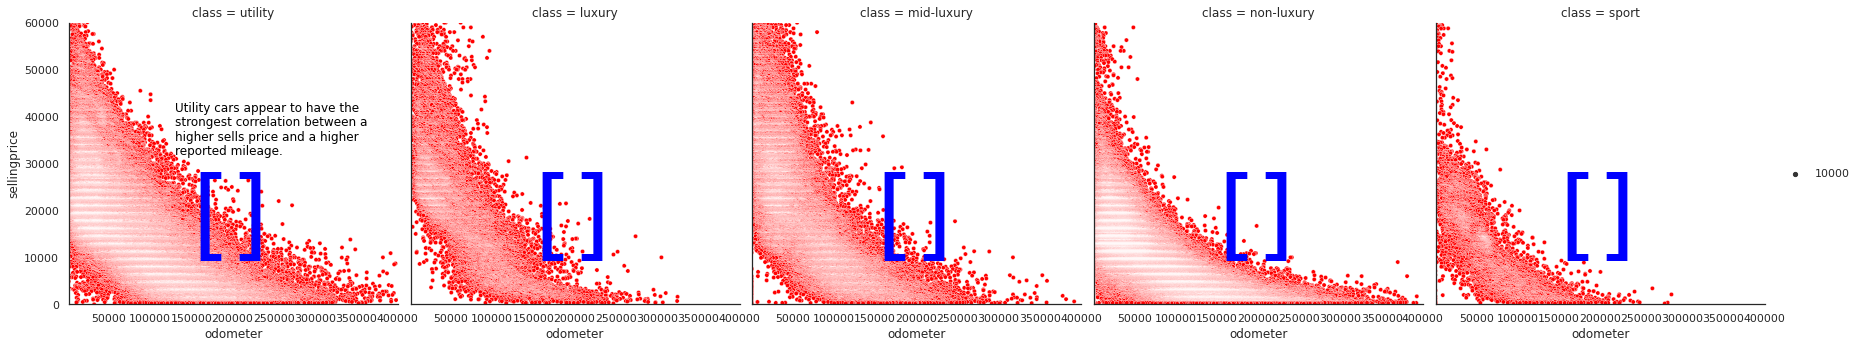

In [242]:
from numpy.core.fromnumeric import std
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

my_data = pd.read_csv('/content/car_prices_3.csv')
sns.set_theme()
sns.set_style('white')

def classify(body_lc):

#Categorizing utility cars  
  if body_lc == ('suv'):
    return ('utility')
  if body_lc ==('truck'):
    return ('utility')
  if body_lc ==('crewcab'):
    return ('utility')
  if body_lc == ('supercrew'):
    return ('utility')
  if body_lc ==('navigation'):
    return ('utility')
  if body_lc ==('access cab'):
    return ('utility')
  if body_lc == ('cab'):
    return ('utility')
  if body_lc ==('cab plus'):
    return ('utility')
  if body_lc ==('truck'):
    return ('utility')
  if body_lc ==('club cab'):
    return ('utility')
  if body_lc ==('truck'):
    return ('utility')
  if body_lc ==('crewmax cab'):
    return ('utility')
  if body_lc ==('crew cab'):
    return ('utility')
  if body_lc ==('van'):
    return ('utility')
  if body_lc ==('extended cab'):
    return ('utility')
  if body_lc ==('king cab'):
    return ('utility')
  if body_lc ==('mega cab'):
    return ('utility')
  if body_lc ==('quad cab'):
    return ('utility')
  if body_lc ==('regular cab'):
    return ('utility')
  if body_lc ==('xtra cab'):
    return ('utility')
  if body_lc ==('e-series van'):
    return ('utility')

#Categorzing into sports

  if body_lc == ('convertible'):
    return ('sport')
  if body_lc ==('beetle convertible'):
    return ('sport')
  if body_lc ==('g convertible'):
    return ('sport')
  
#categorizing into non-luxury 

  if body_lc == ('sedan'):
    return ('non-luxury')
  if body_lc ==('wagon'):
    return ('non-luxury')
  if body_lc ==('coupe'):
    return ('non-luxury')
  if body_lc ==('hatchback'):
    return ('non-luxury')
  if body_lc ==('coupe'):
    return ('non-luxury')
  if body_lc ==('g coupe'):
    return ('non-luxury')
  if body_lc ==('g sedan'):
    return ('non-luxury')
  if body_lc ==('koup'):
    return ('non-luxury')
  if body_lc ==('minivan'):
    return ('non-luxury')

  
my_data=my_data.copy()
my_data
my_car_data = my_data.loc[:,['make','body','odometer','sellingprice','year','state','color']].dropna()
#my_car_data = my_car_data.groupby(by=['odometer','sellingprice','make','body'],as_index=False)
my_car_data['body_lc'] = my_car_data.body.str.lower()
my_car_data['make_lc'] = my_car_data.make.str.lower()
my_car_data = my_car_data.drop(columns='body')
my_car_data = my_car_data.drop(columns='make')
my_car_data['class']=my_car_data.body_lc.apply(classify)
#reclassifying luxury brand cars
my_car_data.loc[(my_car_data.make_lc == 'bmw'),'class'] = 'mid-luxury'
my_car_data.loc[(my_car_data.make_lc == 'audi'),'class'] = 'mid-luxury'
my_car_data.loc[(my_car_data.make_lc == 'lexus'),'class'] = 'mid-luxury'
my_car_data.loc[(my_car_data.make_lc == 'caddilac'),'class'] = 'mid-luxury'
my_car_data.loc[(my_car_data.make_lc == 'land rover'),'class'] = 'mid-luxury'
my_car_data.loc[(my_car_data.make_lc == 'porsche'),'class'] = 'mid-luxury'
my_car_data.loc[(my_car_data.make_lc == 'lincoln'),'class'] = 'mid-luxury'
my_car_data.loc[(my_car_data.make_lc == 'jaguar'),'class'] = 'mid-luxury'
my_car_data.loc[(my_car_data.make_lc == 'hummer'),'class'] = 'mid-luxury'
my_car_data.loc[(my_car_data.make_lc == 'mini'),'class'] = 'mid-luxury'
#re-classifying into luxury
my_car_data.loc[(my_car_data.make_lc == 'maserati'),'class'] = 'luxury'
my_car_data.loc[(my_car_data.make_lc == 'bentley'),'class'] = 'luxury'
my_car_data.loc[(my_car_data.make_lc == 'aston martin'),'class'] = 'luxury'
my_car_data.loc[(my_car_data.make_lc == 'tesla'),'class'] = 'luxury'
my_car_data.loc[(my_car_data.make_lc == 'ferrari'),'class'] = 'luxury'
my_car_data.loc[(my_car_data.make_lc == 'rolls-royce'),'class'] = 'luxury'
my_car_data.loc[(my_car_data.make_lc == 'lamborghini'),'class'] = 'luxury'
my_car_data.loc[(my_car_data.make_lc == 'fisker'),'class'] = 'luxury'
my_car_data.loc[(my_car_data.make_lc == 'lotus'),'class'] = 'luxury'
my_car_data.loc[(my_car_data.make_lc == 'mercedes-benz'),'class'] = 'luxury'
my_car_data.loc[(my_car_data.make_lc == 'mercedes-b'),'class'] = 'luxury'
my_car_data.loc[(my_car_data.make_lc == 'mercedes'),'class'] = 'luxury'
#sorting values in order of price and odometer

my_car_data_grouped = my_car_data.groupby(by=['sellingprice','odometer','class','body_lc','make_lc'],as_index=False)['odometer'].agg('mean').sort_values(by=['sellingprice','odometer'],ascending=False)
my_car_data_grouped.head()
chart = sns.relplot(kind='scatter',data=my_car_data_grouped,x='odometer',y='sellingprice',color='red',col='class',size=10000,height=5)
chart.set(xlim=(1000,400500),ylim=(0,60000),)
ax1=chart.axes[0,0]
ax2=chart.axes[0,1]
ax3=chart.axes[0,2]
ax4=chart.axes[0,3]
ax5=chart.axes[0,4]
ax1.text(x=150000,y=12000,s='[]',color='blue',fontsize=100)
ax1.text(x=130000,y=41000,s='Utility cars appear to have the',color='black',size='medium')
ax1.text(x=130000,y=38000,s='strongest correlation between a',color='black',size='medium')
ax1.text(x=130000,y=35000,s='higher sells price and a higher',color='black',size='medium')
ax1.text(x=130000,y=32000,s='reported mileage.',color='black',size='medium')
ax2.text(x=150000,y=12000,s='[]',color='blue',fontsize=100)
ax3.text(x=150000,y=12000,s='[]',color='blue',fontsize=100)
ax4.text(x=150000,y=12000,s='[]',color='blue',fontsize=100)
ax5.text(x=150000,y=12000,s='[]',color='blue',fontsize=100)
chart.savefig('chart1_grouproject.png')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Text(0.5, 1.0, 'Price frequency for cars with over 100,000 miles')

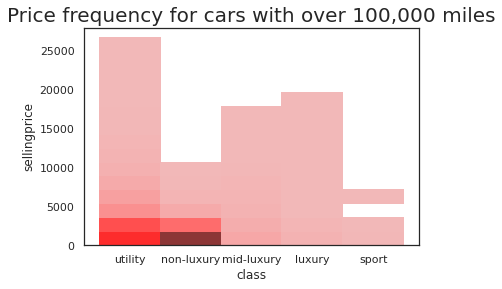

In [243]:
#Creating a graph based on the frequency of cars over 100,000 miles.

my_higher_mileage = my_car_data.odometer > 200000
my_car_data_grouped2 = my_car_data[my_higher_mileage]
my_counts = my_car_data_grouped2.sellingprice.value_counts()
chart2 = sns.histplot(data=my_car_data_grouped2, x='class', y='sellingprice',legend=True,color='red',bins=15)
chart2.set(ylim=(0,28000))
chart2.set_title('Price frequency for cars with over 100,000 miles',fontsize=20)



Text(0.5, 1.0, 'Price frequency for cars with less than 10,000 miles')

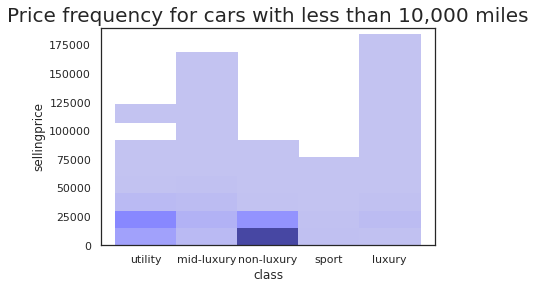

In [244]:
#Creating a graph based on cars with less than 10000 miles.
my_lower_mileage = my_car_data.odometer < 100000
my_car_data_grouped2 = my_car_data[my_lower_mileage]
chart2 = sns.histplot(data=my_car_data_grouped2, x='class', y='sellingprice',legend=True,color='blue',bins=15)
chart2.set(ylim=(0,190000))
chart2.set_title('Price frequency for cars with less than 10,000 miles',fontsize=20)

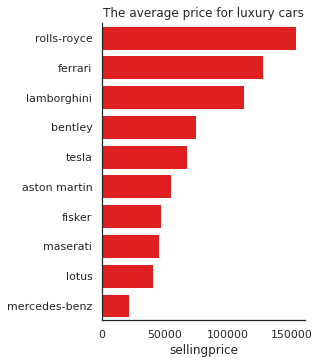

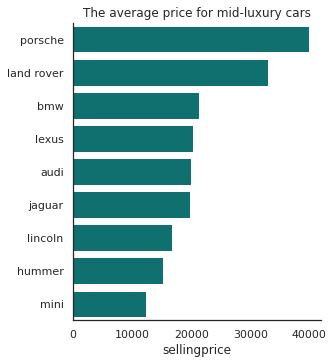

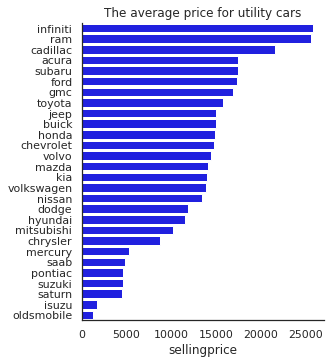

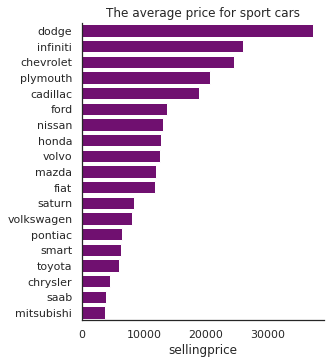

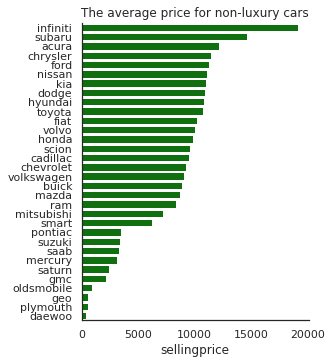

In [245]:
#creating a graph for each class and finding the average price for each brand/make of cars.
my_luxury_class = my_car_data['class']=='luxury'
my_car_data2 = my_car_data[my_luxury_class]
my_make_data_lux = my_car_data2.groupby(by=['class','make_lc'],as_index=False)['sellingprice'].agg('mean').sort_values(by=['sellingprice','class'],ascending=False)
chart5=sns.catplot(kind='bar',data=my_make_data_lux,x='sellingprice',y='make_lc',color='red')
chart5.set(ylabel=None)
chart5.set(title=('The average price for luxury cars'))

my_mid_luxury_class = my_car_data['class']=='mid-luxury'
my_car_data3 = my_car_data[my_mid_luxury_class]
my_make_data_midlux=my_car_data3.groupby(by=['class','make_lc'],as_index=False)['sellingprice'].agg('mean').sort_values(by=['sellingprice','class'],ascending=False)
chart6=sns.catplot(kind='bar',data=my_make_data_midlux,x='sellingprice',y='make_lc',color='teal')
chart6.set(ylabel=None)
chart6.set(title=('The average price for mid-luxury cars'))

my_utility_class = my_car_data['class']=='utility'
my_car_data4 = my_car_data[my_utility_class]
my_make_data_utility=my_car_data4.groupby(by=['class','make_lc'],as_index=False)['sellingprice'].agg('mean').sort_values(by=['sellingprice','class'],ascending=False)
chart7=sns.catplot(kind='bar',data=my_make_data_utility,x='sellingprice',y='make_lc',color='blue')
chart7.set(ylabel=None)
chart7.set(title=('The average price for utility cars'))

my_sport_class = my_car_data['class']=='sport'
my_car_data5 = my_car_data[my_sport_class]
my_make_data_sport=my_car_data5.groupby(by=['class','make_lc'],as_index=False)['sellingprice'].agg('mean').sort_values(by=['sellingprice','class'],ascending=False)
chart8=sns.catplot(kind='bar',data=my_make_data_sport,x='sellingprice',y='make_lc',color='purple')
chart8.set(ylabel=None)
chart8.set(title=('The average price for sport cars'))

my_non_lux_class = my_car_data['class']=='non-luxury'
my_car_data6 = my_car_data[my_non_lux_class]
my_make_data_nonlux=my_car_data6.groupby(by=['class','make_lc'],as_index=False)['sellingprice'].agg('mean').sort_values(by=['sellingprice','class'],ascending=False)
chart9=sns.catplot(kind='bar',data=my_make_data_nonlux,x='sellingprice',y='make_lc',color='green')
chart9.set(ylabel=None)
chart9.set(title=('The average price for non-luxury cars'))



In [241]:
my_car_data.sellingprice.sort_values(ascending=False)

344905    230000
548169    183000
446949    173000
545523    171500
125095    169500
           ...  
530434       100
25588        100
348252         1
293223         1
48453          1
Name: sellingprice, Length: 544836, dtype: int64